# Лабораторная работа №6

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from IPython.display import Image
import graphviz 
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('framingham.csv')
data.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [3]:
data.rename(columns={'male':'sex_male'},inplace=True)
data.head()

sex_male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0         1   39        4.0              0         0.0     0.0   
1         0   46        2.0              0         0.0     0.0   
2         1   48        1.0              1        20.0     0.0   
3         0   61        3.0              1        30.0     0.0   
4         0   46        3.0              1        23.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    195.0  106.0   70.0  26.97   
1                0             0         0    250.0  121.0   81.0  28.73   
2                0             0         0    245.0  127.5   80.0  25.34   
3                0             1         0    225.0  150.0   95.0  28.58   
4                0             0         0    285.0  130.0   84.0  23.10   

   heartRate  glucose  TenYearCHD  
0       80.0     77.0           0  
1       95.0     76.0           0  
2       75.0     70.0           0  
3       65.0    103.0           1  
4       85.0     85.0           0

In [4]:
data.columns

Index(['sex_male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
data.isnull().sum()

sex_male             0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
data.size

67808

In [7]:
data=data.dropna()
data.isnull().sum()

sex_male           0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
data.corr()

sex_male       age  education  currentSmoker  cigsPerDay  \
sex_male         1.000000 -0.024387   0.017677       0.206778    0.331243   
age             -0.024387  1.000000  -0.158961      -0.210862   -0.189099   
education        0.017677 -0.158961   1.000000       0.025253    0.013527   
currentSmoker    0.206778 -0.210862   0.025253       1.000000    0.773819   
cigsPerDay       0.331243 -0.189099   0.013527       0.773819    1.000000   
BPMeds          -0.052128  0.134670  -0.013647      -0.051936   -0.046479   
prevalentStroke -0.002308  0.050864  -0.030353      -0.038159   -0.036283   
prevalentHyp     0.000806  0.306693  -0.079100      -0.107561   -0.069890   
diabetes         0.013833  0.109027  -0.039547      -0.041859   -0.036934   
totChol         -0.070229  0.267764  -0.012956      -0.051119   -0.030222   
sysBP           -0.045484  0.388551  -0.124511      -0.134371   -0.094764   
diaBP            0.051575  0.208880  -0.058502      -0.115748   -0.056650   
BMI              0.072867  0.137172  -0.137280      -0.159574   -0.086888   
heartRate       -0.114923 -0.002685  -0.064254       0.050452    0.063549   
glucose          0.003048  0.118245  -0.031874      -0.053346   -0.053803   
TenYearCHD       0.091745  0.233810  -0.063068       0.019176    0.052159   

                   BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol  \
sex_male        -0.052128        -0.002308      0.000806  0.013833 -0.070229   
age              0.134670         0.050864      0.306693  0.109027  0.267764   
education       -0.013647        -0.030353     -0.079100 -0.039547 -0.012956   
currentSmoker   -0.051936        -0.038159     -0.107561 -0.041859 -0.051119   
cigsPerDay      -0.046479        -0.036283     -0.069890 -0.036934 -0.030222   
BPMeds           1.000000         0.113119      0.263047  0.049051  0.094011   
prevalentStroke  0.113119         1.000000      0.066098  0.009619  0.012697   
prevalentHyp     0.263047         0.066098      1.000000  0.080623  0.167074   
diabetes         0.049051         0.009619      0.080623  1.000000  0.048371   
totChol          0.094011         0.012697      0.167074  0.048371  1.000000   
sysBP            0.271291         0.061080      0.697790  0.102574  0.220130   
diaBP            0.199750         0.055878      0.617634  0.050767  0.174986   
BMI              0.105603         0.036478      0.302917  0.088970  0.120799   
heartRate        0.012894        -0.017020      0.147333  0.060996  0.093057   
glucose          0.054210         0.016051      0.087129  0.614817  0.049749   
TenYearCHD       0.089116         0.048351      0.181556  0.093397  0.091127   

                    sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  
sex_male        -0.045484  0.051575  0.072867  -0.114923  0.003048    0.091745  
age              0.388551  0.208880  0.137172  -0.002685  0.118245    0.233810  
education       -0.124511 -0.058502 -0.137280  -0.064254 -0.031874   -0.063068  
currentSmoker   -0.134371 -0.115748 -0.159574   0.050452 -0.053346    0.019176  
cigsPerDay      -0.094764 -0.056650 -0.086888   0.063549 -0.053803    0.052159  
BPMeds           0.271291  0.199750  0.105603   0.012894  0.054210    0.089116  
prevalentStroke  0.061080  0.055878  0.036478  -0.017020  0.016051    0.048351  
prevalentHyp     0.697790  0.617634  0.302917   0.147333  0.087129    0.181556  
diabetes         0.102574  0.050767  0.088970   0.060996  0.614817    0.093397  
totChol          0.220130  0.174986  0.120799   0.093057  0.049749    0.091127  
sysBP            1.000000  0.786727  0.331004   0.184901  0.134702    0.222885  
diaBP            0.786727  1.000000  0.385611   0.179008  0.063704    0.150342  
BMI              0.331004  0.385611  1.000000   0.074401  0.083671    0.081931  
heartRate        0.184901  0.179008  0.074401   1.000000  0.097026    0.020523  
glucose          0.134702  0.063704  0.083671   0.097026  1.000000    0.121942  
TenYearCHD       0.222885  0.150342  0.081931   0.

In [9]:
print(data.groupby('TenYearCHD').size())

TenYearCHD
0    3099
1     557
dtype: int64


In [10]:
X=data[data.columns]
X=X.drop(columns=['TenYearCHD'])
X.head()

sex_male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0         1   39        4.0              0         0.0     0.0   
1         0   46        2.0              0         0.0     0.0   
2         1   48        1.0              1        20.0     0.0   
3         0   61        3.0              1        30.0     0.0   
4         0   46        3.0              1        23.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    195.0  106.0   70.0  26.97   
1                0             0         0    250.0  121.0   81.0  28.73   
2                0             0         0    245.0  127.5   80.0  25.34   
3                0             1         0    225.0  150.0   95.0  28.58   
4                0             0         0    285.0  130.0   84.0  23.10   

   heartRate  glucose  
0       80.0     77.0  
1       95.0     76.0  
2       75.0     70.0  
3       65.0    103.0  
4       85.0     85.0

In [11]:
Y=data['TenYearCHD']
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [12]:
from sklearn.feature_selection import SelectKBest,chi2
test=SelectKBest(score_func=chi2,k=10)
fit=test.fit(X,Y)
print(fit.scores_)

[ 17.12043013 295.50776101   7.67979651   0.68691311 156.56731824
  28.15300258   8.49782271  82.96718408  31.02798685 249.15307765
 669.50655224 142.87857382  15.73071703   2.91906232 379.58313716]


In [13]:
X.columns

Index(['sex_male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [14]:
X=data[['age','cigsPerDay','totChol','sysBP','glucose']]
X.head()

age  cigsPerDay  totChol  sysBP  glucose
0   39         0.0    195.0  106.0     77.0
1   46         0.0    250.0  121.0     76.0
2   48        20.0    245.0  127.5     70.0
3   61        30.0    225.0  150.0    103.0
4   46        23.0    285.0  130.0     85.0

In [15]:
#from sklearn.preprocessing import StandardScaler
#sc_x=StandardScaler()
#sc_x.fit(X)
#sc_X = sc_x.transform(X)

In [16]:
#X = pd.DataFrame(sc_X, columns = X.columns)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

-------------------------------

## BaggingClassifier

In [18]:
# Обучим классификатор на 4 деревьях
bg1=BaggingClassifier(n_estimators=4, oob_score=True, random_state=10).fit(X,Y)


C:\Anaconda\lib\site-packages\sklearn\ensemble\_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [19]:
bin_array = np.zeros((4, X.shape[0]))
for i in range(4):
    for j in bg1.estimators_samples_[i]:
        bin_array[i][j] = 1

for i in range(4):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))


Для модели № 1 размер OOB составляет 35.61%
Для модели № 2 размер OOB составляет 36.35%
Для модели № 3 размер OOB составляет 37.45%
Для модели № 4 размер OOB составляет 36.980000000000004%


In [20]:
bg1.oob_score_, 1-bg1.oob_score_

(0.799781181619256, 0.20021881838074396)

In [21]:
from graphviz import Source
from sklearn import tree

In [22]:
# дерово, полученное на первой подвыборке 
graph = Source( tree.export_graphviz(bg1.estimators_[0], out_file=None, feature_names=X.columns, filled=True, rounded=True,\
                                     special_characters=True))
png_bytes = graph.pipe(format='png')
from IPython.display import Image
Image(png_bytes, width='100%')

------------

## Случайный лес

In [23]:
tree1 = RandomForestClassifier(n_estimators=4, oob_score=True, random_state=10,max_depth=4)
tree1.fit(X, Y)

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)

#### Out-of-bag error

In [24]:
tree1.oob_score_, 1-tree1.oob_score_

(0.8468271334792122, 0.15317286652078776)

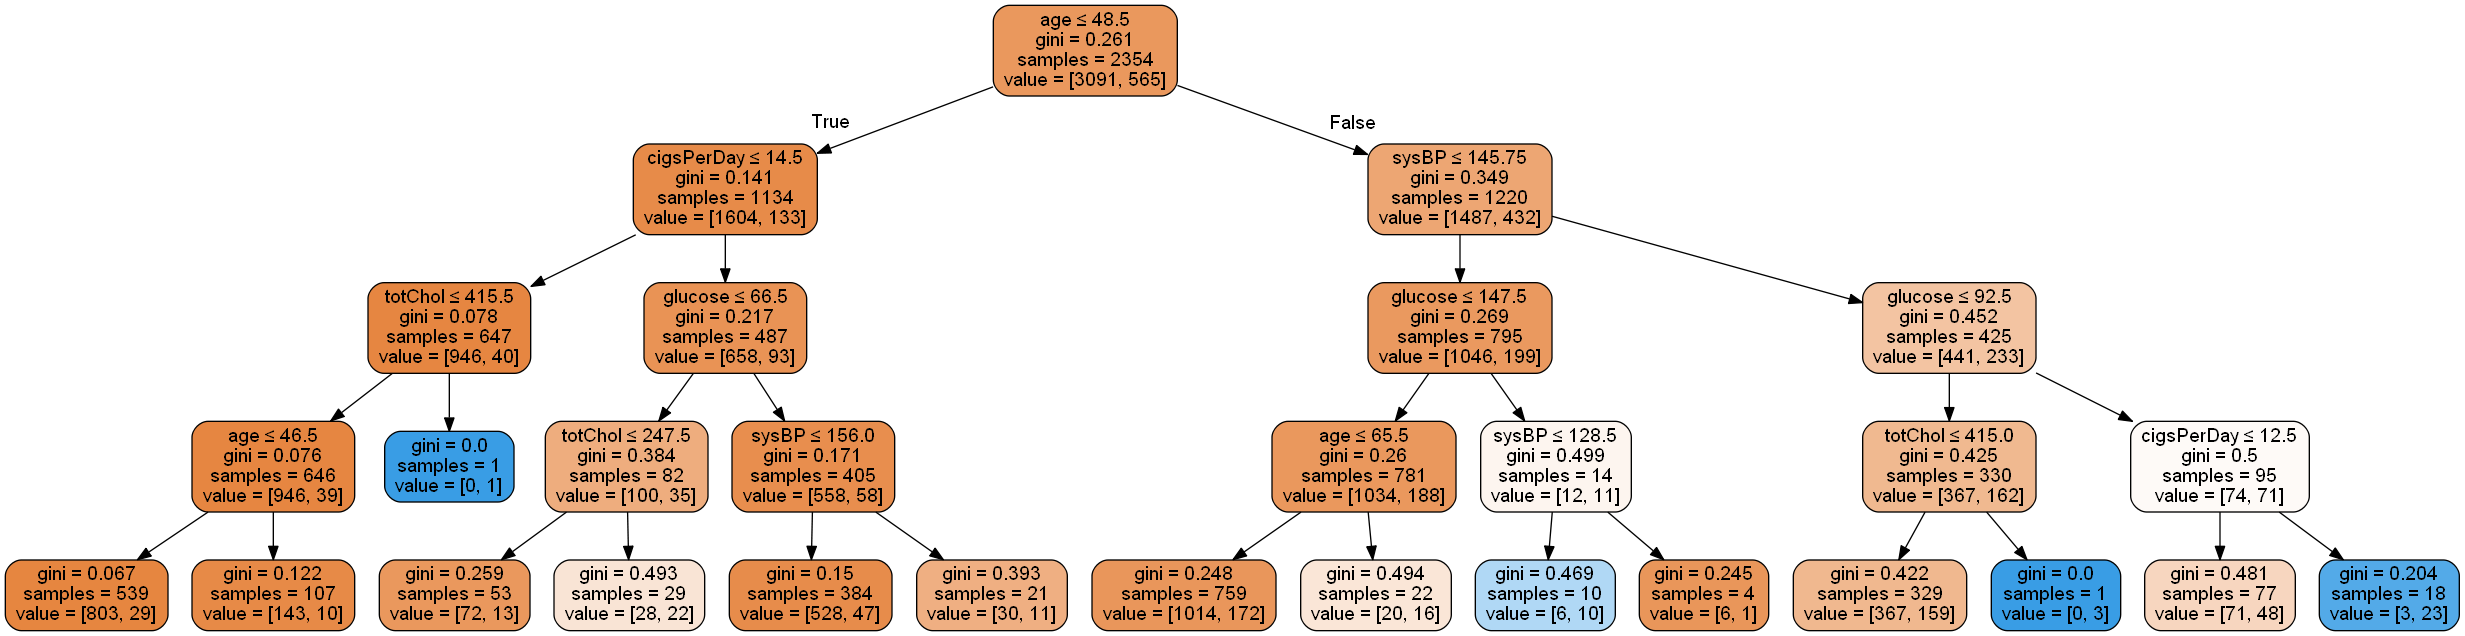

In [25]:
graph = Source( tree.export_graphviz(tree1.estimators_[0], out_file=None, feature_names=X.columns, filled=True, rounded=True,\
                                     special_characters=True))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes, width='100%')

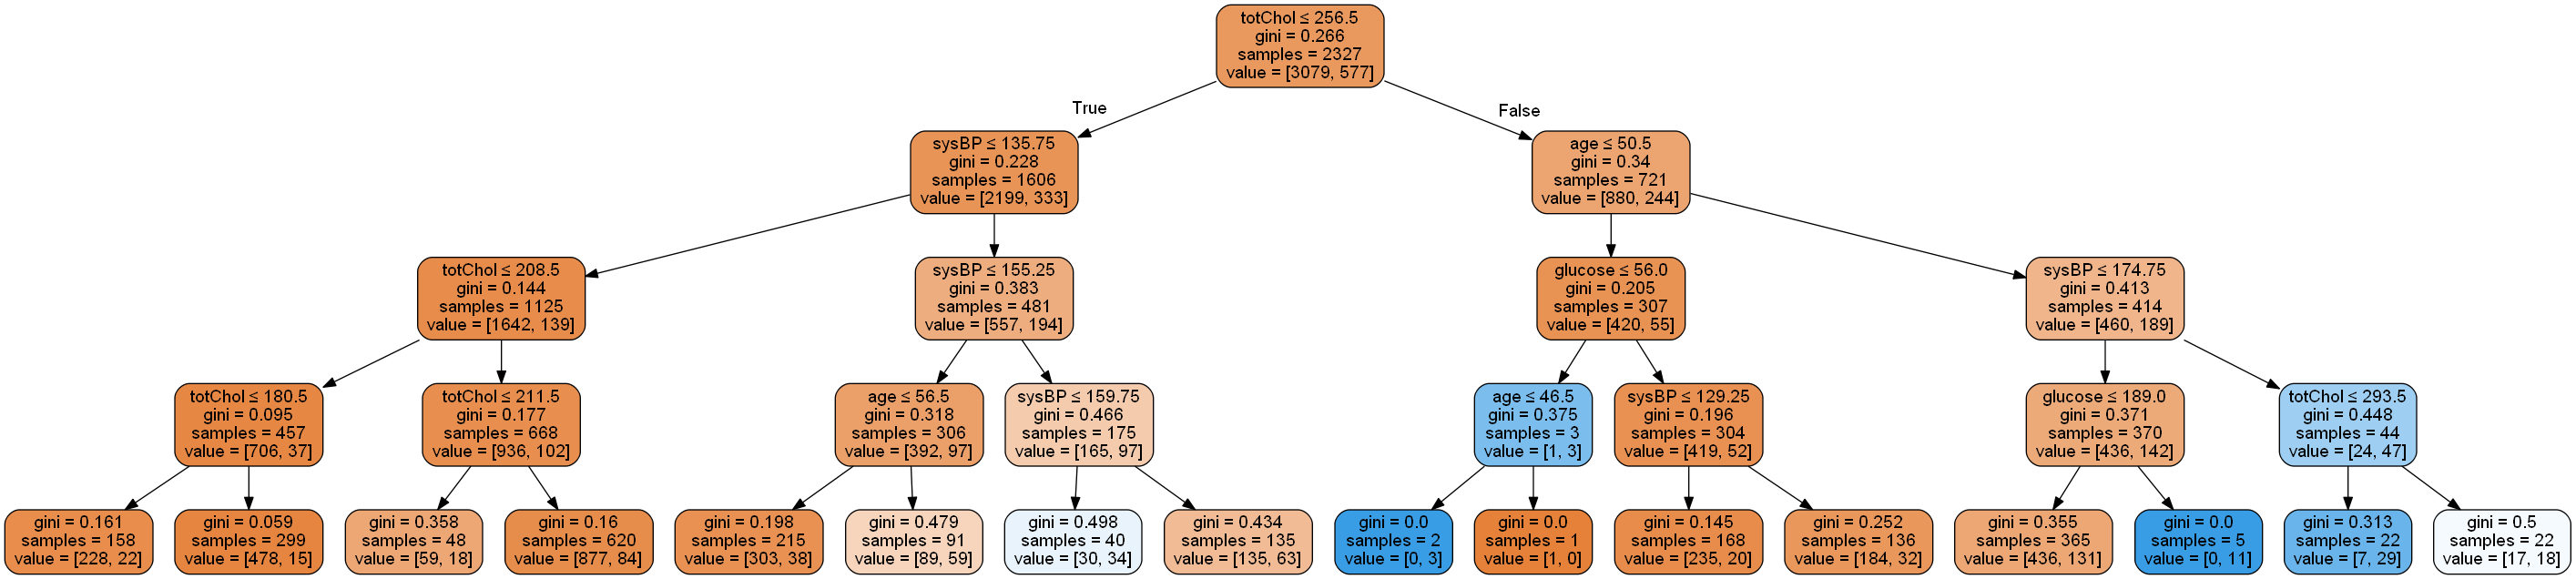

In [26]:
graph = Source( tree.export_graphviz(tree1.estimators_[1], out_file=None, feature_names=X.columns, filled=True, rounded=True,\
                                     special_characters=True))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes, width='100%', )

---
## GradientBoost

In [27]:
gb1 = GradientBoostingClassifier(random_state=1)
gb1.fit(x_train, y_train)
gb1.predict(x_test);

In [28]:
#the mean accuracy
gb1.score(x_test, y_test)

0.8510928961748634

In [29]:
# важность признаков
list(zip(X.columns.values, gb1.feature_importances_))

[('age', 0.28649853503362327),
 ('cigsPerDay', 0.09131284026309042),
 ('totChol', 0.20185744779868733),
 ('sysBP', 0.24954061597235577),
 ('glucose', 0.1707905609322433)]

Модель показала хорошие результаты, но реализация градиентного бустинга в scikit-learn считается неэффективной

-----------------------
